# MOwNiT 
## Laboratorium 5

### Tablice wielowymiarowe i mno≈ºenie macierzy w Julii

In [2]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2√ó2 Matrix{Float64}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [3]:
# mno≈ºenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [4]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2√ó2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

In [5]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

1.458e-6

#### Wersja ulepszona

In [6]:
# Nale≈ºy pamiƒôtaƒá o "column-major" dostƒôpie do tablic - 
# pierwszy indeks zmienia siƒô szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2√ó2 Matrix{Int64}:
 1  2
 3  4

4-element Vector{Int64}:
 1
 3
 2
 4

In [7]:
# poprawiona funkcja korzytajƒÖca z powy≈ºszego oraz z faktu, ≈ºe
# mo≈ºna zmieniaƒá kolejno≈õƒá operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [8]:
@elapsed better_multiplication(Asmall, Bsmall)

0.026785542

#### Wersja BLASowa

In [9]:
#kompilacja funkcji BLASowej do mno≈ºenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2√ó2 Matrix{Float64}:
 1.0  8.0
 0.0  1.0

#### Por√≥wnanie wersji

In [10]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [11]:
@elapsed naive_multiplication(A, B)

3.58912325

In [12]:
@elapsed better_multiplication(A, B)

0.643481583

In [13]:
@elapsed A*B

0.02049475

### Wielomiany i aproksymacja ≈õredniokwadratowa

In [14]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
using Pkg
Pkg.add("Polynomials")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [15]:
# Przyk≈Çadowa funkcja, kt√≥rƒÖ bƒôdziemy aproksymowaƒá
myfun = exp

exp (generic function with 13 methods)

In [16]:
import Pkg; 
Pkg.add("Polynomials")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [17]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzƒô punkty do aproksymacji (tutaj jako przyk≈Çad wyliczone warto≈õci funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.8658708490273 + 2905.5721994684877*x - 1082.7457238744707*x^2 + 100.44658880845455*x^3)

In [18]:
typeof(fit_poly_3)

Polynomial{Float64, :x} (alias for Polynomials.MutableDensePolynomial{Polynomials.StandardBasis, Float64, :x})

In [19]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534441

In [20]:
using Plots

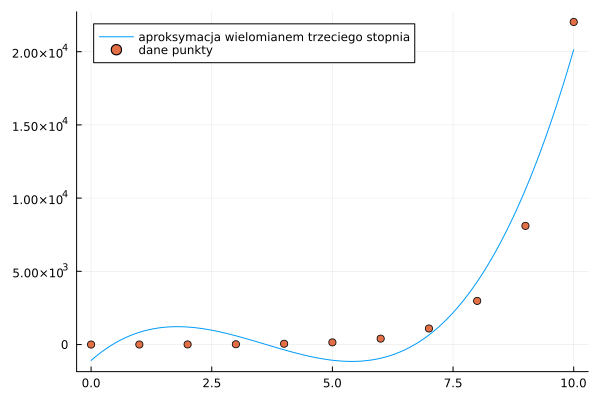

In [21]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punkt√≥w wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [22]:
# podajemy tablicƒô wsp√≥≈Çczynnik√≥w, gdzie wielomiany Czebyszewa sƒÖ wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1‚ãÖT_2(x))

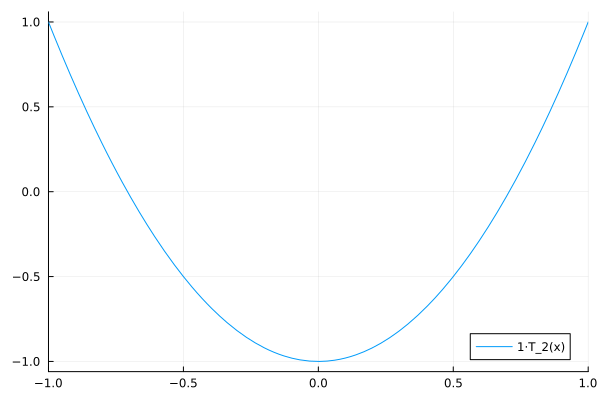

In [23]:
plot(t2)

In [24]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Vector{Float64}:
 -0.7071067811865475
  0.7071067811865476

In [25]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1.0 + 2.0*x^2)

In [26]:
# mo≈ºna tworzyƒá kombinacje liniowe w bazie wielomian√≥w Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3‚ãÖT_0(x) + 2‚ãÖT_1(x) + 1‚ãÖT_2(x))

In [27]:
convert(Polynomial, kombinacja_T)

Polynomial(2.0 + 2.0*x + 2.0*x^2)

SkƒÖd siƒô wzie≈Ço polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [28]:
#using Pkg;
Pkg.add("TaylorSeries")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [29]:
using TaylorSeries

In [30]:
# Definiujemy, ile pierwszych wyraz√≥w szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + ùí™(t‚Å∂)

In [31]:
#Rozwiniƒôcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t¬≤ + 0.16666666666666666 t¬≥ + 0.041666666666666664 t‚Å¥ + 0.008333333333333333 t‚Åµ + ùí™(t‚Å∂)

In [32]:
# Julia hint - jak zapytaƒá o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [33]:
# mogƒô wyciƒÖgnƒÖƒá ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Vector{Float64}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [34]:
# Z przybli≈ºenia Taylora tworzƒô wielomian zrozumia≈Çy dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [35]:
# mogƒô zamieniƒá przybli≈ºenie Taylora na aproksymacjƒô Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64, Float64}(Polynomial(1.0 + 0.5*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomiƒá 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mno≈ºenie BLAS w Julii (`A*B`) 

    dla coraz wiƒôkszych macierzy kwadratowych i zmierzyƒá czasy. Narysowaƒá wykres zale≈ºyno≈õci czasu od rozmiaru macierzy wraz z s≈Çupkami b≈Çƒôd√≥w. Wszystkie trzy metody powinny byƒá na jednym wykresie. **(1pkt)**. Do analizy danych mo≈ºna u≈ºyƒá wybranego narzƒôdzia (Julia, R)
 
 
2. Napisaƒá w jƒôzyku C:
   - naiwnƒÖ metodƒô mno≈ºenia macierzy kwadratowych (wersja 1) 
   - ulepszonƒÖ wersjƒô za pomocƒÖ zamiany pƒôtli metodƒô mno≈ºenia macierzy(wersja 2), pamiƒôtajƒÖc, ≈ºe w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej ni≈º w Julii ! 
   - skorzystaƒá z  mo≈ºliwo≈õci BLAS poziom 3 dostƒôpnego w GSL  (przyk≈Çad uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Nale≈ºy por√≥wnywaƒá dzia≈Çanie tych trzech algorytmow bez w≈ÇƒÖczonej opcji optymalizacji kompilatora. Przedstawiƒá wyniki na jednym wykresie tak jak w p.1. (osobno ni≈º p.1). **(1 pkt)**
    
    *(Dla chƒôtnych)* sprawdziƒá, co siƒô dzieje, jak w≈ÇƒÖczymy optymalizacjƒô kompilatora i dodaƒá do wykresu. 
Do analizy danych mo≈ºna u≈ºyƒá wybranego narzƒôdzia (Julia, R)

3.  U≈ºyƒá aproksymacji odpowiednimi wielomianami, kt√≥re najlepiej pasujƒÖ do zale≈ºno≈õci czasowych ka≈ºdego z algorytm√≥w. Stopie≈Ñ wielomianu powinien zgadzaƒá siƒô z teoretycznƒÖ z≈Ço≈ºonosciƒÖ. Dodaƒá wykresy uzyskanych wielomian√≥w do wcze≈õniejszych wykres√≥w. **(1 pkt)** Do analizy danych mo≈ºna u≈ºyƒá wybranego narzƒôdzia (Julia, R)

4. Pokazaƒá zniwelowanie efektu Rungego  poprzez u≈ºycie wsparcia dla wielomian√≥w Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

5. Przybli≈ºenie Pade jest czƒôsto lepsze ni≈º rozwiniƒôcie w szereg Taylora przy aproksymowaniu funkcji, kt√≥re posiadajƒÖ osobliwo≈õci. KorzystajƒÖc ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazaƒá dowolny przyk≈Çad (wraz z wykresem), gdzie takie przybli≈ºenie faktycznie jest lepsze. Mo≈ºna odtworzyƒá wykres z wyk≈Çadu albo zainspirowaƒá siƒô przyk≈Çadowym artyku≈Çem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**


# Zadanie 1

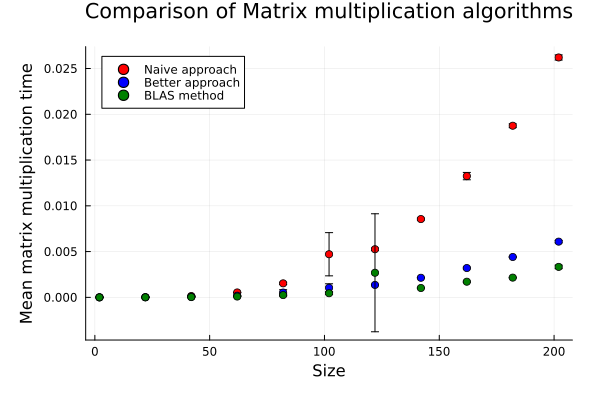

In [37]:
using LinearAlgebra,Statistics,Measures,DataFrames,Polynomials,Plots,CSV,TaylorSeries

df = DataFrame(Size=Int[],Naive=Float64[],Better=Float64[],BLAS=Float64[])
for i in 2:20:202
    for j in 1:10
        matrix1 = rand(0:9,(i,i))
        matrix2 = rand(0:9,(i,i))
        time1 = @timed naive_multiplication(matrix1,matrix2)
        time2 = @timed better_multiplication(matrix1,matrix2)
        time3 = @timed matrix1*matrix2
        push!(df,(i,time1.time,time2.time,time3.time))
    end
end

df2 = combine(
    groupby(df, :Size),
    :Naive => mean => :Naive_mean,
    :Naive => std  => :Naive_std,
    :Better => mean => :Better_mean,
    :Better => std  => :Better_std,
    :BLAS => mean => :BLAS_mean,
    :BLAS => std  => :BLAS_std
)

scatter(
    df2.Size,
    margin = 5mm,
    xlabel = "Size",
    ylabel = "Mean matrix multiplication time",
    [df2.Naive_mean, df2.Better_mean, df2.BLAS_mean],
    title = "Comparison of Matrix multiplication algorithms",
    legend_position = :topleft,
    label = ["Naive approach" "Better approach" "BLAS method"],
    color = [:red :blue :green],
    yerr = [df2.Naive_std df2.Better_std df2.BLAS_std]
)

# Zadanie 2

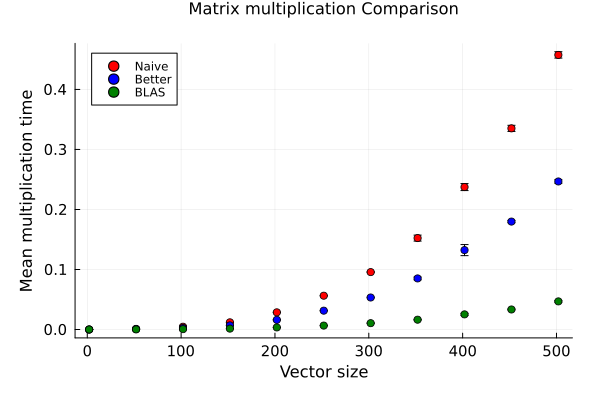

In [39]:
input="benchmark_results_test.csv"
mydata=CSV.read(input, delim=",",DataFrame)
c_data = combine(groupby(mydata,:Size),:Naive => mean => :m1,:Naive=> std => :s1, :Better => mean => :m2, :Better => std => :s2, :BLAS => mean => :m3, :BLAS => std => :s3)
scatter(
    c_data.Size, 
    margin=5mm,xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Vector size",
    ylabel = "Mean multiplication time",
    [c_data.m1,c_data.m2,c_data.m3], 
    title = "Matrix multiplication Comparison", 
    legend_position = :topleft, 
    label = ["Naive" "Better" "BLAS"], 
    color = [:red :blue :green],
    yerr = [c_data.s1 c_data.s2 c_data.s3]
)

# Zadanie 3

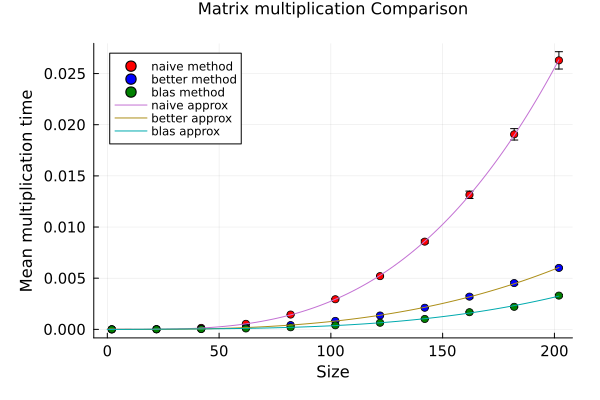

In [ ]:
# Naive is O(n^3)
fit1 = fit(df2.Size, df2.Naive_mean, 3)
# Better is O(n^3)
fit2 = fit(df2.Size, df2.Better_mean, 3)
# BLAS is O(n^2.807) so I can go both with level 3 and level 2 polynomial
fit3 = fit(df2.Size, df2.BLAS_mean, 3)
xs = 0:1:202
scatter(
    df2.Size,  
    margin=5mm,
    xtickfontsize=10, 
    ytickfontsize=10, 
    titlefontsize = 11,
    xlabel = "Size",
    ylabel = "Mean multiplication time",
    [df2.Naive_mean, df2.Better_mean, df2.BLAS_mean], 
    title = "Matrix multiplication Comparison",
    legend_position = :topleft, 
    label = ["naive method" "better method" "blas method"], 
    color = [:red :blue :green],
    yerr = [df2.Naive_std df2.Better_std df2.BLAS_std]
)
plot!(fit1,extrema(xs)...,label="naive approx")
plot!(fit2,extrema(xs)...,label="better approx")
plot!(fit3,extrema(xs)...,label="blas approx")

# Zadanie 4

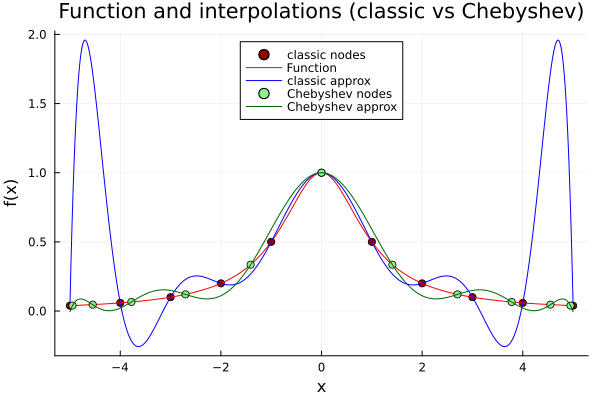

In [145]:
# Function to approximate - classic Runge effect showcasing function
function f(x)
    1 / (1 + x^2)
end

x_plot = -5:0.01:5

### Classic nodes interpolation
x_classic = -5:1:5
y_classic = f.(x_classic)
poly_classic = fit(x_classic, y_classic, 10)
y_classic_interp = poly_classic.(x_plot)

### Chebyshev nodes interpolation

# get chebyshenv T11 to get desired nodes
cheb_poly = ChebyshevT([zeros(11)..., 1])
x_cheb = 5 * Polynomials.roots(cheb_poly)
y_cheb = f.(x_cheb)
poly_cheb = fit(x_cheb, y_cheb, 10)
y_cheb_interp = poly_cheb.(x_plot)


scatter(
    x_classic, y_classic,
    label = "classic nodes", color = :darkred,
    title = "Function and interpolations (classic vs Chebyshev)",
    xlabel = "x", ylabel = "f(x)",
    legend_position = :top
)

plot!(f, extrema(x_classic)..., label = "Function", color = :red)
plot!(x_plot, y_classic_interp, label = "classic approx", color = :blue)

scatter!(
    x_cheb, y_cheb,
    label = "Chebyshev nodes", color = :lightgreen
)
plot!(x_plot, y_cheb_interp, label = "Chebyshev approx", color = :darkgreen)

# Zadanie 5

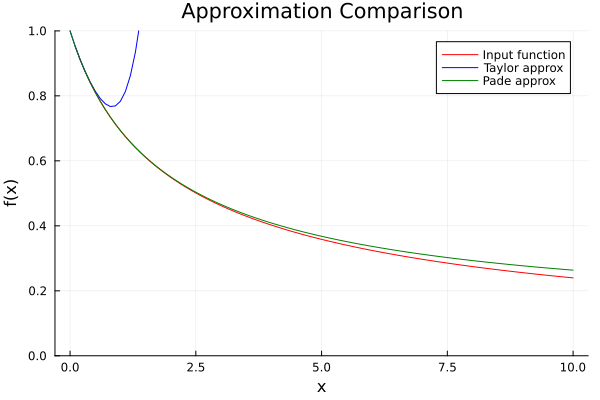

In [ ]:

function test(x)
    log(1+x)/x
end

t = Taylor1(Float64, 5)
test_taylor = test(t)
test_taylor_approx = Polynomial(test_taylor.coeffs)
test_pade = Polynomials.PolyCompat.PadeApproximation.Pade(test_taylor_approx, 2, 2)

xsf = 0:0.1:10

y1 = [test(x) for x in xsf]
y2 = [test_taylor_approx(x) for x in xsf]
y3 = [test_pade(x) for x in xsf]

plot(
    xsf,  
    [y1,y2,y3], 
    xlabel = "x",
    ylabel = "f(x)",
    ylims = [0,1],
    title = "Approximation Comparison",
    legend_position = :topright, 
    label = ["Input function" "Taylor approx" "Pade approx"], 
    color = [:red :blue :green],
)